In [1]:
import torch
from torch import nn
from d2l import torch as d2l


In [2]:
# def vgg_block(num_convs,in_channels,out_channels):
#     layer=[]
#     for _ in range(num_convs):
#         layer.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
#         layer.append(nn.ReLU())
#         in_channels=out_channels
#      layer.append(nn.MaxPool2d(kernel_size=2,stride=2))

#     return nn.Sequential(*layer)
    
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [3]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [4]:
def vgg(conv_arch):
    conv_blks=[]
    in_channel=1
    for (num_conv,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_conv,in_channel,out_channels))
        in_channel=out_channels
    return nn.Sequential(*conv_blks,
                         nn.Flatten(),
                         nn.Linear(out_channels*7*7,4096),nn.ReLU(),nn.Dropout(p=0.5),
                         nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
                         nn.Linear(4096,10))

net=vgg(conv_arch)

In [5]:
X=torch.rand(1,1,224,224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,"out shanpe:\t",X.shape)

Sequential out shanpe:	 torch.Size([1, 64, 112, 112])
Sequential out shanpe:	 torch.Size([1, 128, 56, 56])
Sequential out shanpe:	 torch.Size([1, 256, 28, 28])
Sequential out shanpe:	 torch.Size([1, 512, 14, 14])
Sequential out shanpe:	 torch.Size([1, 512, 7, 7])
Flatten out shanpe:	 torch.Size([1, 25088])
Linear out shanpe:	 torch.Size([1, 4096])
ReLU out shanpe:	 torch.Size([1, 4096])
Dropout out shanpe:	 torch.Size([1, 4096])
Linear out shanpe:	 torch.Size([1, 4096])
ReLU out shanpe:	 torch.Size([1, 4096])
Dropout out shanpe:	 torch.Size([1, 4096])
Linear out shanpe:	 torch.Size([1, 10])


In [6]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
print(small_conv_arch)
net = vgg(small_conv_arch)

[(1, 16), (1, 32), (2, 64), (2, 128), (2, 128)]


training on cuda:0


KeyboardInterrupt: 

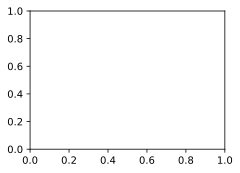

In [8]:
lr, num_epochs, batch_size = 0.05, 10, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())